In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [4]:
train_data = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv")
test_data = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_test.csv")

In [5]:
print("Train Shape --> ",train_data.shape)
print("Test Shape --> ",test_data.shape)

Train Shape -->  (60000, 785)
Test Shape -->  (10000, 785)


In [6]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 	 # Train Data value counts # 
 1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64


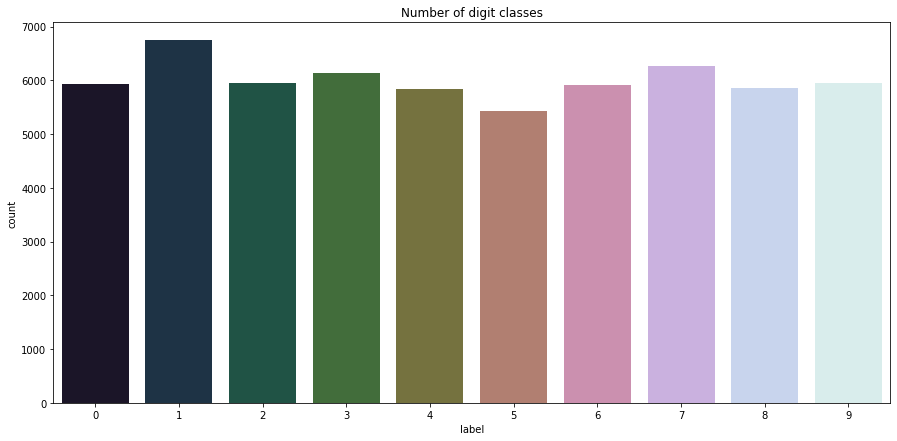

In [7]:

plt.figure(figsize=(15,7))
g = sns.countplot(train_data["label"], palette="cubehelix")
plt.title("Number of digit classes")
print(" \t # Train Data value counts # \n",train_data["label"].value_counts())

In [8]:
X_train = train_data.drop(["label"], axis = 1).values
y_train = train_data.label.values

X_test = test_data.drop(["label"], axis = 1).values
y_test = test_data.label.values

In [9]:
print("X_train shape --> ",X_train.shape)
print("y_train shape --> ",y_train.shape)
print("X_test shape --> ",X_test.shape)
print("y_test shape --> ",y_test.shape)

X_train shape -->  (60000, 784)
y_train shape -->  (60000,)
X_test shape -->  (10000, 784)
y_test shape -->  (10000,)


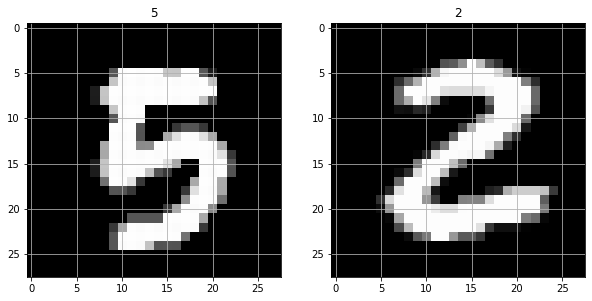

In [10]:
plt.figure(figsize=(10,8))
img = X_train[244]
img = img.reshape((28,28))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title(train_data.iloc[244,0])
plt.grid()

img1 = X_train[25]
img1 = img1.reshape((28,28))
plt.subplot(1,2,2)
plt.imshow(img1,cmap='gray')
plt.title(train_data.iloc[25,0])
plt.grid()
plt.show()

In [11]:
X_train = (X_train.astype(np.float32)-127.5)/127.5
print("X_train Shape --> ",X_train.shape)

X_train Shape -->  (60000, 784)


In [12]:
# in --> (60000, 28, 28)
#X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
# out --> (60000, 784)

In [13]:
from keras.layers import Dense, Dropout, Input, ReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam

In [14]:
generator = Sequential()
generator.add(Dense(units = 512, input_dim = 100))
generator.add(ReLU())

generator.add(Dense(units = 512))
generator.add(ReLU())

generator.add(Dense(units = 1024))
generator.add(ReLU())

In [15]:
generator.add(Dense(units = 784, activation = "tanh"))

In [16]:
generator.compile(loss = "binary_crossentropy",
                optimizer = Adam(lr = 0.0001, beta_1 = 0.5))

In [17]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               51712     
_________________________________________________________________
re_lu (ReLU)                 (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
re_lu_1 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
re_lu_2 (ReLU)               (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               8

In [18]:
discriminator = Sequential()
discriminator.add(Dense(units = 1024, input_dim = 784))
discriminator.add(ReLU())
discriminator.add(Dropout(0.4))

discriminator.add(Dense(units = 512))
discriminator.add(ReLU())
discriminator.add(Dropout(0.4))

discriminator.add(Dense(units = 256))
discriminator.add(ReLU())

In [19]:
discriminator.add(Dense(units = 1, activation = "sigmoid"))

In [20]:
discriminator.compile(loss = "binary_crossentropy",
                      optimizer = Adam(lr = 0.0001, beta_1 = 0.5))

In [21]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
re_lu_3 (ReLU)               (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
re_lu_4 (ReLU)               (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

In [22]:
discriminator.trainable = False
gan_input = Input(shape = (100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(inputs = gan_input, outputs = gan_output)
gan.compile(loss = "binary_crossentropy", optimizer = "adam")

In [23]:
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 784)               1643280   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 1460225   
Total params: 3,103,505
Trainable params: 1,643,280
Non-trainable params: 1,460,225
_________________________________________________________________


In [24]:
epochs = 50
batch_size = 256

In [25]:
for e in range(epochs):
    for _ in range(batch_size):
        
     
        noise = np.random.normal(0,1, [batch_size, 100])  
        
    
        generated_images = generator.predict(noise)
  
        image_batch = X_train[np.random.randint(low = 0, high = X_train.shape[0], size = batch_size)]
        
     
        x = np.concatenate([image_batch, generated_images])
        
    
        y_dis = np.zeros(batch_size*2)
        y_dis[:batch_size] = 1
  
        discriminator.trainable = True
        discriminator.train_on_batch(x,y_dis)
  
        noise = np.random.normal(0,1, [batch_size,100]) 
        y_gen = np.ones(batch_size)
        
        discriminator.trainable = False
        
        gan.train_on_batch(noise, y_gen)
    print("epochs: ",e)
        

epochs:  0
epochs:  1
epochs:  2
epochs:  3
epochs:  4
epochs:  5
epochs:  6
epochs:  7
epochs:  8
epochs:  9
epochs:  10
epochs:  11
epochs:  12
epochs:  13
epochs:  14
epochs:  15
epochs:  16
epochs:  17
epochs:  18
epochs:  19
epochs:  20
epochs:  21
epochs:  22
epochs:  23
epochs:  24
epochs:  25
epochs:  26
epochs:  27
epochs:  28
epochs:  29
epochs:  30
epochs:  31
epochs:  32
epochs:  33
epochs:  34
epochs:  35
epochs:  36
epochs:  37
epochs:  38
epochs:  39
epochs:  40
epochs:  41
epochs:  42
epochs:  43
epochs:  44
epochs:  45
epochs:  46
epochs:  47
epochs:  48
epochs:  49


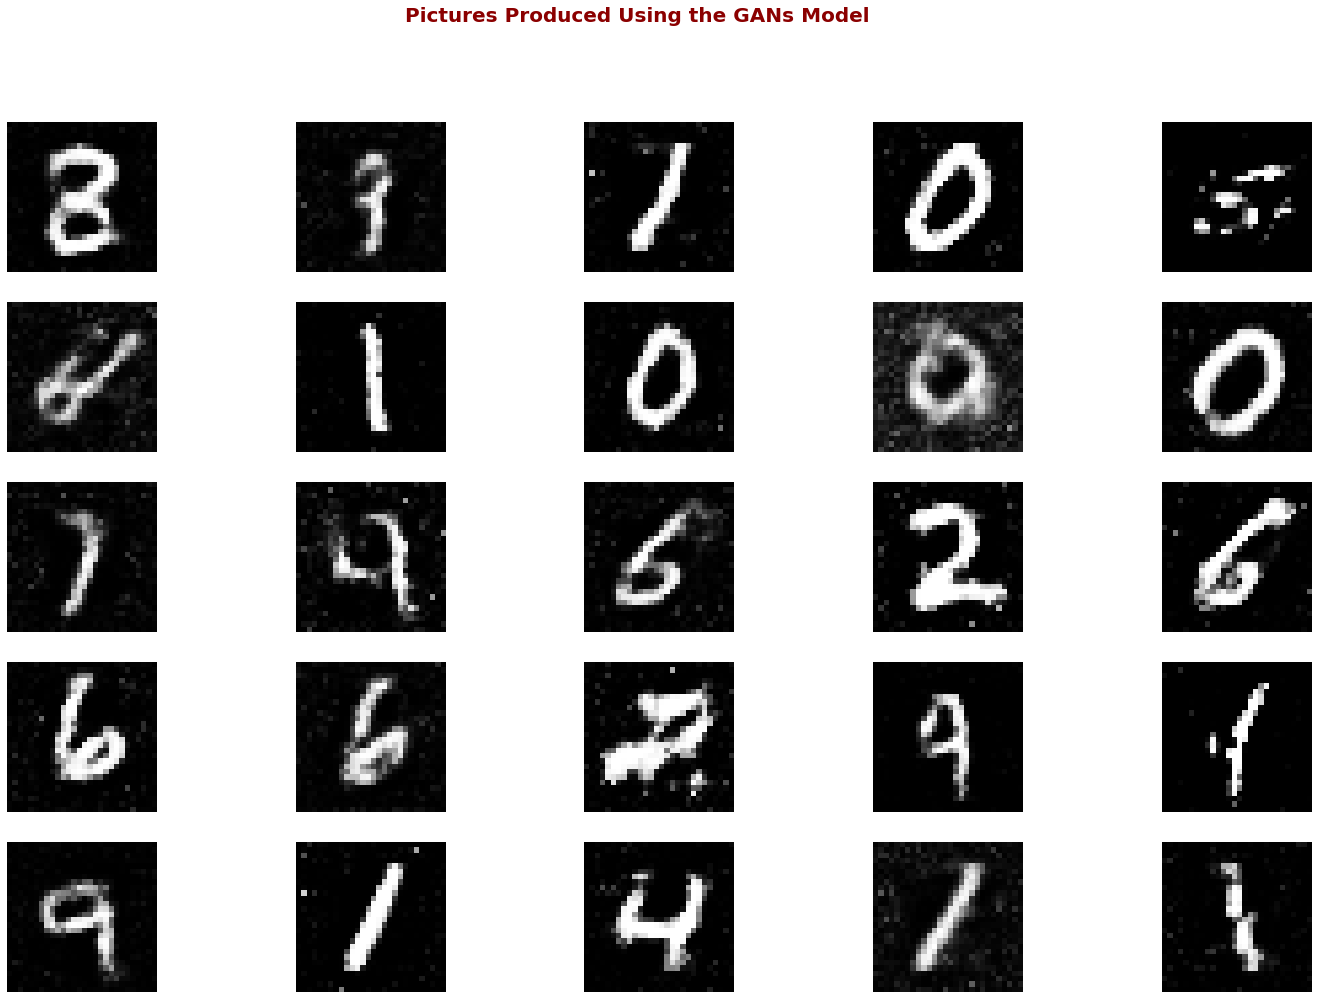

In [26]:
plt.figure(figsize=(25,16))
noise= np.random.normal(loc=0, scale=1, size=[100, 100])
generated_images = generator.predict(noise)
generated_images = generated_images.reshape(100,28,28)

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(generated_images[i], interpolation='nearest', cmap = "gray")
    plt.axis('off')

plt.suptitle("Pictures Produced Using the GANs Model", fontsize = 20 , color = "darkred", fontweight = 'bold')
plt.show()